importing Jupyter notebook from Analysing_and_Cleaning.ipynb
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78313 entries, 0 to 78312
Data columns (total 22 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   _index                             78313 non-null  object 
 1   _type                              78313 non-null  object 
 2   _id                                78313 non-null  object 
 3   _score                             78313 non-null  float64
 4   _source.tags                       10900 non-null  object 
 5   _source.zip_code                   71556 non-null  object 
 6   _source.complaint_id               78313 non-null  object 
 7   _source.issue                      78313 non-null  object 
 8   _source.date_received              78313 non-null  object 
 9   _source.state                      76322 non-null  object 
 10  _source.consumer_disputed          78313 non-null  object

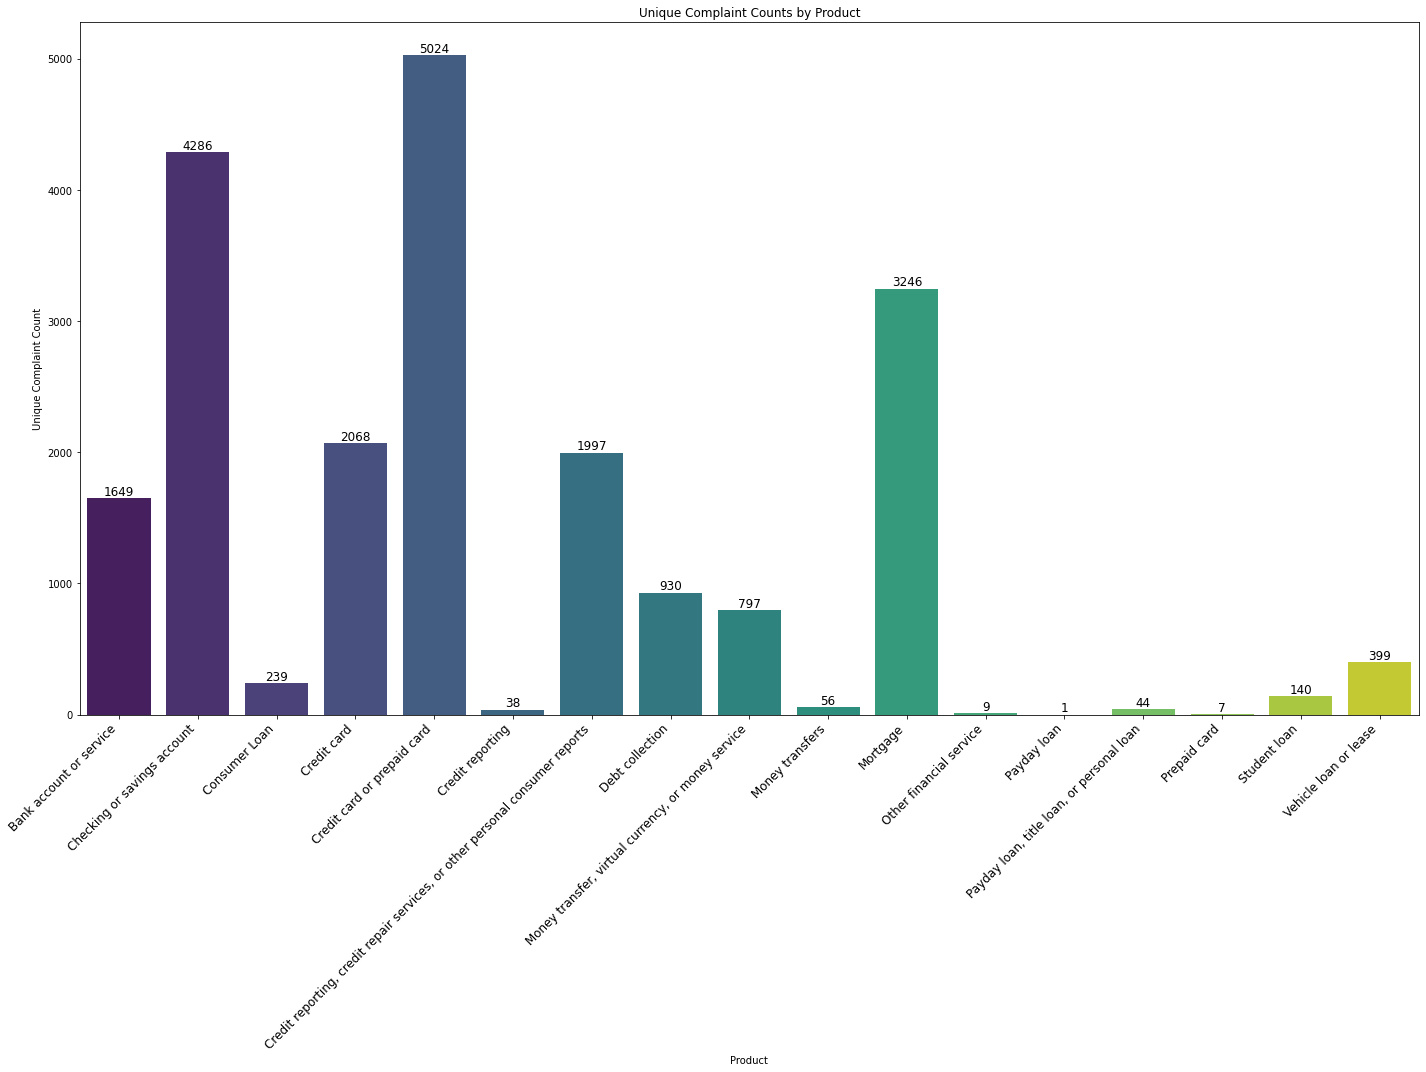

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20930 entries, 1 to 78312
Data columns (total 3 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   product                  20930 non-null  object
 1   complaint_what_happened  20930 non-null  object
 2   category                 20930 non-null  object
dtypes: object(3)
memory usage: 654.1+ KB


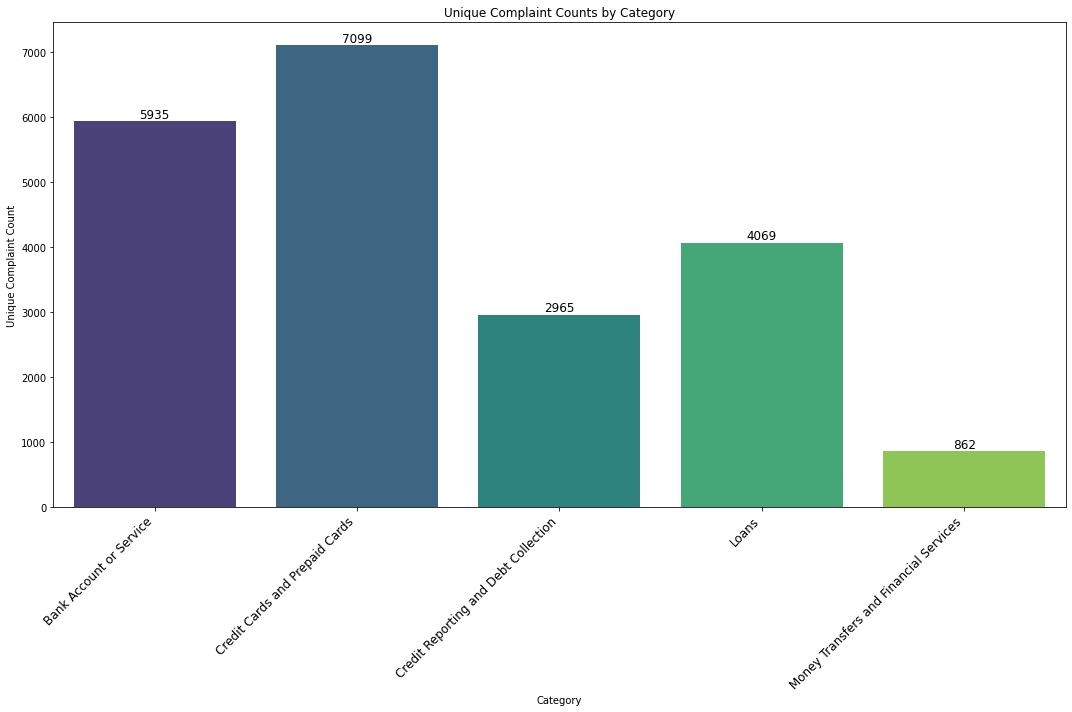

In [2]:
import re
import warnings
from tqdm import tqdm
import spacy
import pandas as pd
import import_ipynb
from Analysing_and_Cleaning import df


In [3]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')
stop_words = nlp.Defaults.stop_words

warnings.filterwarnings('ignore')

# Enable the progress bar for pandas
tqdm.pandas()

# change the display properties of pandas to max
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Prepare the text for classification

In [4]:
# Load English language model in spaCy
nlp = spacy.load('en_core_web_sm')

def preprocess_text(text):
    text = text.lower()  # Convert to lower case
    text = re.sub(r'^\[[\w\s]\]+$', ' ', text)  # Remove text in square brackets
    text = re.sub(r'[^\w\s]', ' ', text)  # Remove punctuation
    text = text.replace('\n', '')  # Remove newline characters
    text = re.sub(r'[^a-zA-Z\s]', '', text)   # Remove special characters and numbers
    text = re.sub(r'(.)\1+|\b\w\b', r'\1', text)  # Remove repeated characters and single letters
    
    # Tokenize and filter by POS tags using spaCy
    doc = nlp(text)
    filtered_tokens = [token for token in doc if token.pos_ in {'PRON', 'NOUN', 'VERB', 'ADJ'}]
    
    # Lemmatize the text using spaCy
    lemmatized_text = ' '.join([token.lemma_ for token in filtered_tokens])
    
    return lemmatized_text

# Preprocess text columns
df['complaint_what_happened_lemmatized'] = df['complaint_what_happened'].apply(lambda x: preprocess_text(x))
# Remove the 'x' 'xx' 'xxx' and 'xxxx' from the text columns
df['complaint_what_happened_lemmatized'] = df['complaint_what_happened_lemmatized'].str.replace(r'x{1,4}', '', regex=True)

# Function to remove stopwords
def remove_stopwords(text):
    # Load spaCy stopwords
    stopwords = spacy.lang.en.stop_words.STOP_WORDS # type: ignore
    # Tokenize the text using spaCy
    doc = nlp(text)
    # Filter out tokens that are not stopwords
    filtered_text = ' '.join([token.text for token in doc if token.text.lower() not in stopwords])
    return filtered_text

# Apply remove_stopwords function to create a new column with text without stopwords
df['complaint_what_happened_without_stopwords'] = df['complaint_what_happened_lemmatized'].apply(remove_stopwords)

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20930 entries, 1 to 78312
Data columns (total 6 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   product                                    20930 non-null  object
 1   complaint_what_happened                    20930 non-null  object
 2   category                                   20930 non-null  object
 3   category_encoded                           20930 non-null  int64 
 4   complaint_what_happened_lemmatized         20930 non-null  object
 5   complaint_what_happened_without_stopwords  20930 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.1+ MB


In [5]:
df.head()

,product,complaint_what_happened,category,category_encoded,complaint_what_happened_lemmatized,complaint_what_happened_without_stopwords
1,Debt collection,Good morning my name is XXXX XXXX and I appreciate it if you could help me put a stop to Chase Bank cardmember services. \nIn 2018 I wrote to Chase asking for debt verification and what they sent me a statement which is not acceptable. I am asking the bank to validate the debt. Instead I been receiving mail every month from them attempting to collect a debt. \nI have a right to know this information as a consumer. \n\nChase account # XXXX XXXX XXXX XXXX Thanks in advance for your help.,Credit Reporting and Debt Collection,0,morning my name apreciate it you help I put stop chase bank cardmember service write chase ask debt verification what they send I statement which aceptable ask bank validate debt receive mail month they atempte colect debt have right know information consumer chase thank advance your help,morning apreciate help stop chase bank cardmember service write chase ask debt verification send statement aceptable ask bank validate debt receive mail month atempte colect debt right know information consumer chase thank advance help
2,Credit card or prepaid card,I upgraded my XXXX XXXX card in XX/XX/2018 and was told by the agent who did the upgrade my anniversary date would not change. It turned the agent was giving me the wrong information in order to upgrade the account. XXXX changed my anniversary date from XX/XX/XXXX to XX/XX/XXXX without my consent! XXXX has the recording of the agent who was misled me.,Credit Cards and Prepaid Cards,1,upgrade my card tell agent who upgrade my aniversary date change it turn agent give I wrong information order upgrade acount change my aniversary date my consent have recording agent who mislead I,upgrade card tell agent upgrade aniversary date change turn agent wrong information order upgrade acount change aniversary date consent recording agent mislead
10,"Credit reporting, credit repair services, or other personal consumer reports","Chase Card was reported on XX/XX/2019. However, fraudulent application have been submitted my identity without my consent to fraudulently obtain services. Do not extend credit without verifying the identity of the applicant.",Credit Reporting and Debt Collection,0,card report fraudulent aplication submit my identity my consent obtain service etend credit verify identity aplicant,card report fraudulent aplication submit identity consent obtain service etend credit verify identity aplicant
11,"Credit reporting, credit repair services, or other personal consumer reports","On XX/XX/2018, while trying to book a XXXX XXXX ticket, I came across an offer for {$300.00} to be applied towards the ticket if I applied for a rewards card. I put in my information for the offer and within less than a minute, was notified via the screen that a decision could not be made. I immediately contacted XXXX and was referred to Chase Bank. I then immediately contacted Chase bank within no more than 10minutes of getting the notification on the screen and I was told by the Chase representative I spoke with that my application was denied but she could not state why. I asked for more information about the XXXX offer and she explained that even if I had been approved, the credit offer only gets applied after the first account statement and could not be used to purchase the ticket. I then explicitly told her I was glad I got denied and I was ABSOLUTELY no longer interested in the account. I asked that the application be withdrawn and the representative obliged. This all happened no later than 10mins after putting in the application on XX/XX/2018. Notwithstanding my explicit request not to proceed with the application and contrary to what I was told by the Chase representative, Chase did in fact go ahead to open a credit account in my name on XX/XX/2018. This is now being reported in my Credit Report and Chase has refused to correct

In [15]:
data = df[(df['complaint_what_happened_lemmatized'].str.strip() != '') &
                    (df['complaint_what_happened_without_stopwords'].str.strip() != '')]

data.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 20929 entries, 1 to 78312
Data columns (total 6 columns):
 #   Column                                     Non-Null Count  Dtype 
---  ------                                     --------------  ----- 
 0   product                                    20929 non-null  object
 1   complaint_what_happened                    20929 non-null  object
 2   category                                   20929 non-null  object
 3   category_encoded                           20929 non-null  int64 
 4   complaint_what_happened_lemmatized         20929 non-null  object
 5   complaint_what_happened_without_stopwords  20929 non-null  object
dtypes: int64(1), object(5)
memory usage: 1.1+ MB


In [16]:
# Specify the file path where you want to save the modified DataFrame as a CSV file
# output_file = '/home/users/elicina/Master-Thesis/Dataset/Cleaned_Dataset.csv'

# Save the modified DataFrame to a CSV file 
# data.to_csv(output_file, index=False)